# Naive Bayes Implementation From Scratch

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Defining the naive bayes class with the necessary functions

This  class is all about making classifications using the Naive Bayes algorithm, which is based on probability. We're keeping it simple and don't need any instance-specific variables to be initialized upfront. Hence, we skipped the __init__ method.

The core of this class lies in the fit method. When you call fit with your training data X and corresponding labels y, it's where the magic happens. We calculate the mean, variance, and prior probabilities for each class based on the given data. These essential statistics help us make better predictions later on.

Next, when we want to make predictions with new data points, we use the predict method. It calls the _predict method for each sample in the input X, where we calculate the posterior probabilities for each class.

then the _prob_dens_func method calculates the probability density function for each feature of a given sample. It's a vital step in the Naive Bayes algorithm to estimate how likely a sample belongs to a specific class. 

To summarize, once you've fitted the model with fit, you can use the predict method to make predictions on new data!

In [2]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape # this will return number of samples/training examples and the total number of features
        self._classes = np.unique(y) # this will given number of unique classes 
        n_classes = len(self._classes)

        # Calculate the mean, variance, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for class_idx in range(len(self._classes)):
            c = self._classes[class_idx]
            X_c = X[y == c]
            self._mean[class_idx, :] = X_c.mean(axis=0)
            self._var[class_idx, :] = X_c.var(axis=0)
            self._priors[class_idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X] # calls the _predict method to make the prediction for each example(x) in examples matrix (X)
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = [] # initialize the posteriors as an empty list

        # Calculate posterior probability for each class using the normal distribution's probability density function
        for class_idx in range(len(self._classes)):
            c = self._classes[class_idx]
            prior = np.log(self._priors[class_idx]) # getting log prior
            posterior = np.sum(np.log(self._prob_dens_func(class_idx, x))) # getting log likelihoods and adding to assign to posterior
            posterior = posterior + prior # adding log likelihoods and log prior and assigning to posterior
            posteriors.append(posterior) 

        # Return the class with the highest posterior
        return self._classes[np.argmax(posteriors)] # class with highest posterior will be output

    def _prob_dens_func(self, class_idx, x): # this is defined as we have numerical data. Hence likelihoods will be found using it
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


Let's discuss the under the hood working of this class

Firstly, the matrix X and y look like this

![](111.jpg)

#### In the fit method, the mean, variance and prior arrays are all initalized to zero.

The matrices of mean and variance and the priors vector(1-d array) looks as shown.

![](222.jpg)

Then we start iterating across the already created vector that stores all the unqiue output labels /classes, going through each iteration with a separate class.

![](333.jpg)

We create a new matrix called X_c that contains the list of examples for the currrent iteration's class(class c). 

![](444.jpg)

We will then use this X_c inside the iteration of that class c to calculate the class c's mean, variance and prior and then store in the respective variables. A visual depictions of how each class gets its mean, variance and prior stored is provided below.

![](555.jpg)

#### After the fit method, the predict method is shown using the _predict within it 

The _predict works by calculating the posteriors by calculating the log sums of likelihoods and prior to get the posterior probability of each class.

Then the _predict method appends the different class posteriors in the empty list of posterios. Finally the predicted class will be the one with highest posterios probability which is found using the argmax function

#### The prob_dens_function is used to help calculate the likelihoods themselves

It does so by calculating the likelihood by using the normal distribution and then returning the likelihood which is then used inside the _predict method to get the log likelihoods' sum.

Now we define the function for loading the data and splitting into X and Y (input features and output labels)

In [3]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data[['x_1', 'x_2']].values
    y = data['y'].values
    return X, y

Now we define a function for calculating accuracy by checking the predictions vs actual data

In [4]:
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

Visualising the test and train data using scatter plots

In [5]:
# Load training and testing data
train_file = "ds2_train.csv"
test_file = "ds2_test.csv"

X_train, y_train = load_data(train_file)
X_test, y_test = load_data(test_file)

X_train,X_train.shape

(array([[3.7594805 , 7.5079397 ],
        [3.42205706, 4.99120267],
        [2.77881751, 4.11207082],
        ...,
        [3.54410545, 2.64987938],
        [2.57546055, 2.51725473],
        [3.5608151 , 3.99184993]]),
 (800, 2))

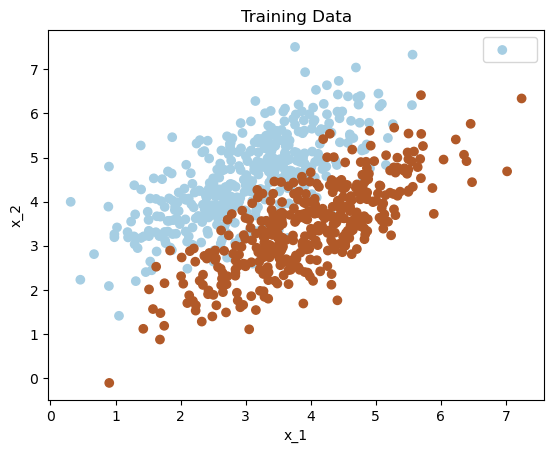

In [13]:
# Visualization of training and test data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Paired', label=' ')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Training Data')
plt.legend()
plt.show()

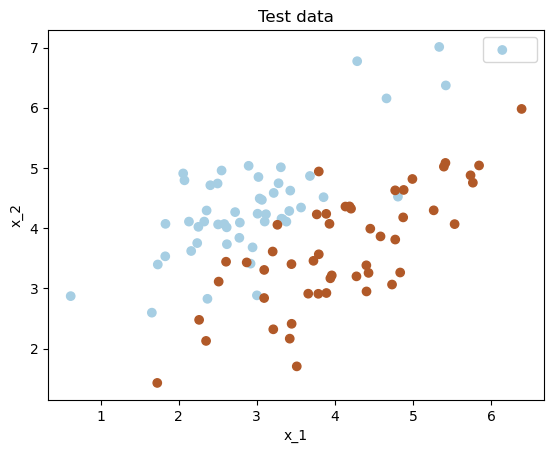

In [16]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Paired', marker='o',label=' ')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Test data')
plt.legend()
plt.show()

Implementing the Naive Bayes model by use of all the functions defined in the class and then checking accuracy and visualising

In [17]:
# Create and train the Naive Bayes classifier
nb_classifier = NaiveBayes()
nb_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
train_predictions = nb_classifier.predict(X_train)
test_predictions = nb_classifier.predict(X_test)

# Calculate and print accuracies
train_accuracy = calculate_accuracy(y_train, train_predictions)
test_accuracy = calculate_accuracy(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.915
Test Accuracy: 0.92


The accuracy is >91% for both training and test datas which is a good sign. 

Naive Bayes is a very powerful classifier supervised algorithm and due to it's simplicity and robustness, it is also used in spam text filtering and many other classifier applications. We went through the example of a binary Naive bayes classifier but the code can also be used for multiple classes, which is a big plus compared to logistic regression. 

What's more is that the model is a generative algorithm, so it gives the most optimum solution possible according to the data and the model's working with only a single shot of calulcations unlike logistic regression that required optimisation and approximation algorithms like gradient descent or newton's method, which was time taking and very computationally intensive.

But if the data is not following a normal distribution as assumed by the likelihoofd calculating function, then the Naive Bayes works worse than Logistic regression which doesnt have such strong underlying assumptions. 

Hence logistic regression is more robust and generalized for classification whereas Naive Bayes works good on approximately normally distributed data.

#### Now, let's plot our model's decision boundary using a meshgrid and its contour plot on our data's scatterplot as shown below

In [20]:
def plot_decision_boundary(X, y, nb_classifier, title):
    h = .02# Step size in the mesh. varying this will make more refined or more jagged decision boundary.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = nb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='Paired')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='k', label='Data')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title(title)
    plt.legend()
    plt.show()

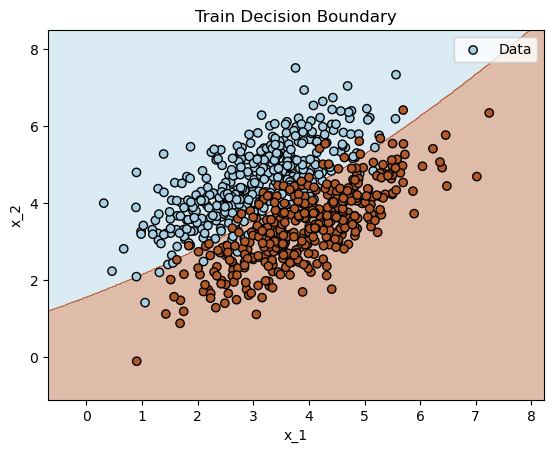

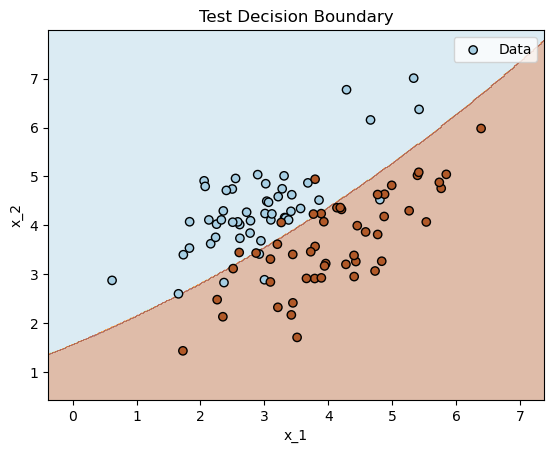

In [21]:
plot_decision_boundary(X_train, y_train, nb_classifier, "Train Decision Boundary")
plot_decision_boundary(X_test, y_test, nb_classifier, "Test Decision Boundary")

# Thank You

---